## Instruments and Pricing engines

In [1]:
from QuantLib import *

In [17]:
#set up global evaluation date
today = Date(7, 3, 2014)
Settings.instance().evaluationDate = today

In [13]:
# call option
# strike price 100.0

option = EuropeanOption(PlainVanillaPayoff(Option.Call, 100.0),
                         EuropeanExercise(Date(7, June, 2014)))
print(option)

<QuantLib.QuantLib.EuropeanOption; proxy of <Swig Object of type 'EuropeanOptionPtr *' at 0x000001FDEA5F5810> >


In [6]:
# underlying value = u
# risk-free value = r
# volatility = sigma

u = SimpleQuote(100.0)
r = SimpleQuote(0.01)
sigma = SimpleQuote(0.20)

In [34]:
# Assume Flat curves for risk-free rate and volatility

riskFreeCurve = FlatForward(0, TARGET(), QuoteHandle(r), Actual360())
volatility = BlackConstantVol(0, TARGET(), QuoteHandle(sigma), Actual360())

In [14]:
process = BlackScholesProcess(QuoteHandle(u), 
                              YieldTermStructureHandle(riskFreeCurve),
                              BlackVolTermStructureHandle(volatility))

print(process)

<QuantLib.QuantLib.BlackScholesProcess; proxy of <Swig Object of type 'BlackScholesProcessPtr *' at 0x000001FDEA5F5120> >


In [12]:
engine = AnalyticEuropeanEngine(process)

In [15]:
option.setPricingEngine(engine)

In [18]:
print(option)
print(option.NPV())

<QuantLib.QuantLib.EuropeanOption; proxy of <Swig Object of type 'EuropeanOptionPtr *' at 0x000001FDEA5F5810> >
4.155543462156206


In [20]:
print("Delta: ", option.delta())
print("Gamma: ", option.gamma())
print("Vega: ", option.vega())

Delta:  0.5302223303784392
Gamma:  0.03934493301271913
Vega:  20.109632428723106


In [21]:
u.setValue(105.0)
print("option value when underlying price is 105:", option.NPV())

option value when underlying price is 105: 7.27556357927846


In [26]:
%%capture
%pylab inline --no-import-all
import matplotlib.pyplot as plot
import numpy
from IPython.display import display
# import utils
# utils.set_default_plot_size()

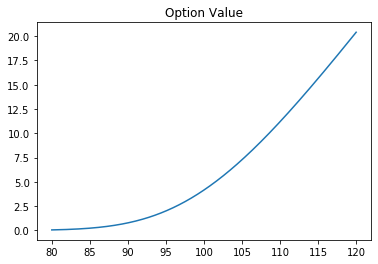

In [25]:
f, ax = plot.subplots()
xs = numpy.linspace(80.0, 120.0, 400)
ys = []

for x in xs:
    u.setValue(x)
    ys.append(option.NPV())

ax.set_title('Option Value')
ax.plot(xs, ys)

In [40]:
# Date Change

u.setValue(105.0)
r.setValue(0.01)
sigma.setValue(0.20)

print(option.NPV())

6.580816382997355


In [30]:
Settings.instance().evaluationDate = Date(7, April, 2014)
print(option.NPV())

6.560073820974377


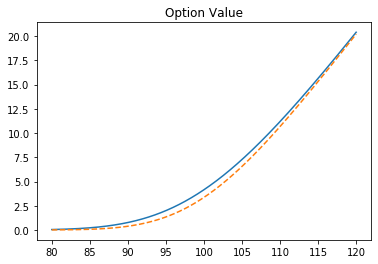

In [31]:
ys = []
for x in xs:
    u.setValue(x)
    ys.append(option.NPV())

ax.plot(xs, ys, '--')
display(f)

### Heston Model Pricing

In [41]:
'''
HestonProcess (const Handle< YieldTermStructure > &riskFreeRate,
               const Handle< YieldTermStructure > &dividendYield, 
               const Handle< Quote > &s0, 
               Real v0, 
               Real kappa, 
               Real theta, 
               Real sigma, 
               Real rho, 
               Discretization d=QuadraticExponentialMartingale)
               

dS = mu * S * dt + sqrt(v) * S * dw1
dv = k * (theta - v) * dt + sigma * sqrt(v) * dw2
dw1 * dw2 = rho * dt


'''


model = HestonModel(HestonProcess(YieldTermStructureHandle(riskFreeCurve),
                                  YieldTermStructureHandle(FlatForward(0, TARGET(),
                                                                       0.0, Actual360())),
                                  QuoteHandle(u),
                                  0.04, 0.1, 0.01, 0.05, -0.75))

In [43]:
engine = AnalyticHestonEngine(model)
option.setPricingEngine(engine)

print(option.NPV())

6.580816382997355


### Monte Carlo Engine

In [47]:
'''

MCEuropeanEngine (const ext::shared_ptr< GeneralizedBlackScholesProcess > &process, 
                  Size timeSteps, 
                  Size timeStepsPerYear, 
                  bool brownianBridge, 
                  bool antitheticVariate, 
                  Size requiredSamples, 
                  Real requiredTolerance, 
                  Size maxSamples, 
                  BigNatural seed)

MCEuropeanEngine<Single Variate, RNG, S >    

RNG = PseudoRandom

'''

engine = MCEuropeanEngine(process, "PseudoRandom", timeSteps=50, requiredSamples=250000)

option.setPricingEngine(engine)

%time print(option.NPV())

6.550312754336204
Wall time: 4.28 s


#### Re-run the process, the value will not change, instead, change other parameters, e.g the underlying value

In [48]:
u.setValue(104.0)
%time print(option.NPV())

5.843483701612551
Wall time: 4.27 s
